In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

path = './data/'

In [95]:
sido = pd.read_csv(path+'시도별지역안전지표_2015.csv', encoding='cp949', engine='python')
sido

,년도,시도,지역,1인가구수,5대범죄 발생건수,가로등수,가스공급설비 면적,가스사고 발생건수,가스사고 부상자수,가스사고 사망자수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,강력범죄 발생건수,건강검진 2차검진율,건강보험급여실적,건강보험급여실적(약국),건강보험급여실적(외래),건강보험급여실적(입원),건설업 업체수,건설업 종사자수,건축용지 면적,경찰공무원수,경찰관서수,고령인구수,공공문화체육시설수,공공질서 및 안전예산 비율,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),교통안전점검 대상 시설 수,교통안전점검 실시 건수,교통안전지수,구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조된 사람수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,놀이시설사고 발생건수,놀이시설사고 부상자수,놀이시설사고 사망자수,농기계사고 발생건수,농기계사고 부상자수,농기계사고 사망자수,다중이용업소수,대기배출시설 점검 위반율,대기오염도,대기오염물질 배출 사업장수,대기오염물질 배출량,도로면적,도로면적 비율,도로연장,도매 및 소매업 종사자수,도시지역 면적,도시지역 면적 비율,독거노인수,등산사고 발생건수,등산사고 부상자수,등산사고 사망자수,레저(생활체육)사고 발생건수,레저(생활체육)사고 부상자수,레저(생활체육)사고 사망자수,무면허교통사고 발생건수,무허가건물수,반지하가구 수,방수시설 면적,방재지구 면적,방조설비 면적,방화성 산불건수,방화지구 면적,배수시설 면적,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,병원수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행우선구역 지정면적,보행자전용·우선도로 면적,보행자전용·우선도로 연장,분뇨처리시설수,붕괴사고 발생건수,붕괴사고 부상자수,붕괴사고 사망자수,붕괴사고건수,비닐하우스 면적,빈집수,사방설비 개소,사방설비 면적,사회복지사수,산림 감시원수,산림면적,산림면적 비율,산불 감시소수,산불발생건수,산불피해면적,산사태 발생면적,산사태위험지역 면적,산업단지 규모,산업단지수,산업재해 사망만인율,산업재해 사망자수,산업재해 재해율,산업재해 재해자수,상수도 미급수 지역 주민수,상수도 보급률,상업지역 면적,성폭력 발생건수,소년범죄 발생건수,소년소녀가장수,소방공무원수,소음진동 배출시설수,수계밀도,수난(물놀이)사고 발생건수,수난(물놀이)사고 사망자수,수난(익사 등)사고 발생건수,수난(익사 등)사고 부상자수,수난(익사 등)사고 사망자수,수영장수,수질오염물질 배출 사업장수,숙박 및 음식점업 종사자수,순이동자수,스트레스인지율,승강기사고 발생건수,승강기사고 부상자수,승강기사고 사망자수,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,시특법 관련 D.E등급 시설수(건축물),시특법 관련 D.E등급 시설수(그외시설물),식중독 발생건수,식중독 발생자수,식품제조가공업체 위반건수,실업률,아동안전지킴이집수,안전사고 사망자수,안전실천과제 캠페인 건수,안전실천과제 캠페인 참여인원,야간산불건수,야간산불면적,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 식품안전보호구역수,어린이 아토피,어린이 천식,연간 낙상경험률,열공급설비 면적,오존경보 발생횟수,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,위험물 제조소수,위험물저장소수,위험물제조소수,위험물취급소수,유류저장 및 송유설비 면적,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,응급처치교육을 받은 주민 비율,의료급여 1종세대수,의료급여 1종인구수,의료급여 2종세대수,의료급여 2종인구수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 공.교 사업장수,의료보장 근로자 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보장 적용인구,의료보험료,의료인력,의료인력수,의사수,의용소방대원수,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,일반주거지역 면적,임야 면적,자동차등록대수,자살 사망자수,자살예방 상담·교육 실시 건수,자살예방 상담·교육 이수자수,자살예방센터 근무자수,자살예방용 긴급전화수,자연재해 발생건수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액,자연재해 피해액(10년평균),자연재해 피해자수,자연재해 피해자수(10년평균),자연재해위험개선사업 실시 면적,자연재해위험개선지구 수,자연재해위험개선지구 지정 면적,자원봉사자 등록률,자전거사고 발생건수,자전거사고 부상자수,자전거사고 사망자수,장애인수,재난 심리지원 전문요원수,재난심리지원센터수,재난안전 교육 실시건수,재난안전 교육 이수공무원수,재난안전네트워크 구축달성율,재난약자수,재산세액,재정자립도,재정자주도,저수지 저수용량,전기(감전)사고 발생건수,전기(감전)사고 부상자수,전기(감전)사고 사망자수,전기화재발생건수,전통시장 면적,전통시장수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),주요예방접종을 한 주민수,주점업 업체수,지방소득세액,지역별 부도업체수,지역안전공동체 회원수,지역안전공동체수,지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),지역자율방재단 회원수,질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업 종사자수,총 사업체수,총 종사자수,총전입자수,추락 사망자수,추락사고 발생건수,추락사고 부상자수,추락사고 사망자수,특수의료장비수,특정관리대상 D등급 시설수,특정관리대상 E등급 시설수,특정관리대상 시설수,폐기물 매립시설수,폐기물 발생량,폐기물 소각시설수,폐기물 처리시설수,폐수배출시설 점검 위반율,폭발사고 발생건수,폭발사고 부상자수,폭발사고 사망자수,폭염사망자수,하수관거 보급률,하수관거 준설률,하수도 설치율,하수처리장 시설용량,하수폐기물처리 및 환경복원업 업체수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),한파사망자수,해난사고 발생건수,해난사고 사망자수,해난사고 실종자수,해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재예방교육을 받은 주민 비율,화재피해 경감액,화학물질 및 화학제품 제조업 업체수(의약품제외),화학물질 배출량,황사 발생건수,화재,교통,자연재해,범죄,안전사고,자살,감염병
0,2015,강원도,2015_강원도,1006.53181,106.70520,NaN,6.58064,NaN,NaN,NaN,0.05180,0.15540,32.05041,1.93597,NaN,NaN,1570302.608,NaN,NaN,NaN,38.64179,292.10550,0.01313,NaN,0.78345,1657.10334,NaN,0.02576,27.73170,0.00217,71.95588,221.23848,396.93948,1.40504,0.03885,NaN,NaN,NaN,0.00835,0.83450,41.57489,60.22240,5.07627,NaN,18.64751,NaN,352.84588,119.71961,33.17703,0.55036,NaN,NaN,NaN,NaN,NaN,NaN,39.19862,43.0,51.652,NaN,NaN,0.01521,1.52096,446.35829,NaN,0.24148,24.14771,375.42362,NaN,NaN,NaN,NaN,NaN,NaN,55.71592,NaN,NaN,0.00001,0.00000,NaN,NaN,0.00023,0.00000,3.76188,0.36259,1.48921,0.90648,0.33669,0.16187,0.04532,40.19575,62.22312,111.09514,NaN,289.85873,18.66046,NaN,8.946726e+02,145.19160,

In [96]:
#널값 삭제한 데이터 프레임 만들기
sido_null_drop=sido.dropna(axis=1)
len(sido_null_drop.columns)

163

In [98]:
#삭제된 컬럼수 : 331-163 = 168
len(sido.columns)-len(sido_null_drop.columns)

168

In [22]:
sido_null_drop

,년도,시도,지역,1인가구수,5대범죄 발생건수,가스공급설비 면적,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공공질서 및 안전예산 비율,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,구거면적,구거면적 비율,구조구급 발생건수,구조구급대원수,구조발생건수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,다중이용업소수,대기배출시설 점검 위반율,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,방재지구 면적,방화지구 면적,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,빈집수,산림면적,산림면적 비율,산불발생건수,상업지역 면적,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,식중독 발생건수,식중독 발생자수,식품제조가공업체 위반건수,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 식품안전보호구역수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,위험물 제조소수,유류저장 및 송유설비 면적,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,일반주거지역 면적,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자원봉사자 등록률,장애인수,재난심리지원센터수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,폐기물 처리시설수,폐수배출시설 점검 위반율,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,화재,교통,자연재해,범죄,안전사고,자살,감염병
0,2015,강원도,2015_강원도,1006.53181,106.70520,6.58064,0.05180,0.15540,32.05041,1.93597,1570302.608,38.64179,292.10550,0.01313,0.78345,1657.10334,0.02576,27.73170,0.00217,71.95588,221.23848,396.93948,1.40504,0.00835,0.83450,60.22240,5.07627,18.64751,352.84588,119.71961,33.17703,0.55036,39.19862,43.0,0.01521,1.52096,446.35829,0.24148,24.14771,375.42362,55.71592,0.00000,0.00023,3.76188,0.36259,1.48921,0.90648,0.33669,0.16187,0.04532,40.19575,62.22312,111.09514,289.85873,18.66046,8.946726e+02,145.19160,338.10269,0.81339,81.33872,43.38633,0.00107,13.50002,27.2,1.14,692.44426,786.20628,538.18143,248.02485,0.07122,0.75756,1.18489,9293.93270,45.8,31.90796,0.01942,2.86188,97.99008,105.05412,93.51598,8.1,75.3,63.0,42.22237,1.42771,0.00790,0.78975,103.25412,190.57368,461.73958,55.71592,15.29355,558.79081,211.66868,214.41401,6.009800e+06,0.40144,23.50363,0.14892,92.39,33.4,0.00763,0.81992,4319.64425,3.64533,0.00041,0.0000,0.00018,9740.29164,0.00027,20.75,640.81396,0.00647,2281.30937,18.69,37.93,2.68058,0.00106,0.10645,48.09504,337.70773,0.00819,1544442.0,1319.33087,2228.66252,4962.53663,1158.85867,0.81772,3.0,0.54317,0.51283,64.65000,7.96404,3.74893,520.95190,2597.97390,1478.65054,0.61511,1.22374,0.25899,62.0,0.02259,2.25930,0.13965,0.75108,1.04892,2.27267,16825.57754,15.80506,14.12808,0.12950,87192.52649,0.75108,4.46116,0.23668,1.927265e+05,4,3,3,4,4,5,3
1,2015,경기도,2015_경기도,629.04248,103.94220,36.71902,0.03399,0.08416,24.82070,0.85452,1350783.699,21.18495,157.63204,0.07900,0.28969,1015.10136,0.00961,8.02487,0.01185,78.33710,203.54221,328.58439,0.68378,0.01815,1.81496,38.62167,1.40963,8.71755,151.03218,52.93972,18.61168,0.22010,31.76124,1046.0,0.03982,3.98184,1639.83523,0.38982,38.98189,152.94837,38.93240,0.00000,0.00098,3.70453,0.25814,1.16040,0.72100,0.30021,0.15132,0.03884,45.04674,54.78146,94.26412,240.73078,14.38602,3.444814e+03,361.42672,124.69746,0.51804,51.80392,47.18518,0.00598,46.44505,30.2,7.14,622.42319,908.40787,499.03826,409.36961,0.08092,1.53020,0.78655,8975.45605,44.0,23.16912,0.01780,1.36351,127.69556,166.44508,284.97398,7.0,81.8,62.4,18.93941,201.04544,0.00718,0.71849,147.12292,105.81065,328.90160,38.93240,14.40868,251.56925,257.80578,260.81521,8.636617e+06,0.27351,23.37951,0.06797,1249.60,34.7,0.04833,0.53198,3798.82795,2.54009,0.00109,0.0000,0.00052,6071.36709,0.00077,19.62,411.34244,0.00081,1754.80970,48.71,50.97,1.90891,0.00190,0.19022,94.49394,978.35947,0.05360,12357830.0,1574.94156,1440.86381,4966.90519,1241.22196,0.79474,3.0,0.55755,0.46639,64.70

### 각 y값에 대한 상관계수 보기

- 결측값 있어도 상관계수는 계산됨, 현재 코드는 null값 하나라도 있는 열은 다 빼고 만든 코드

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  if sys.path[0] == '':


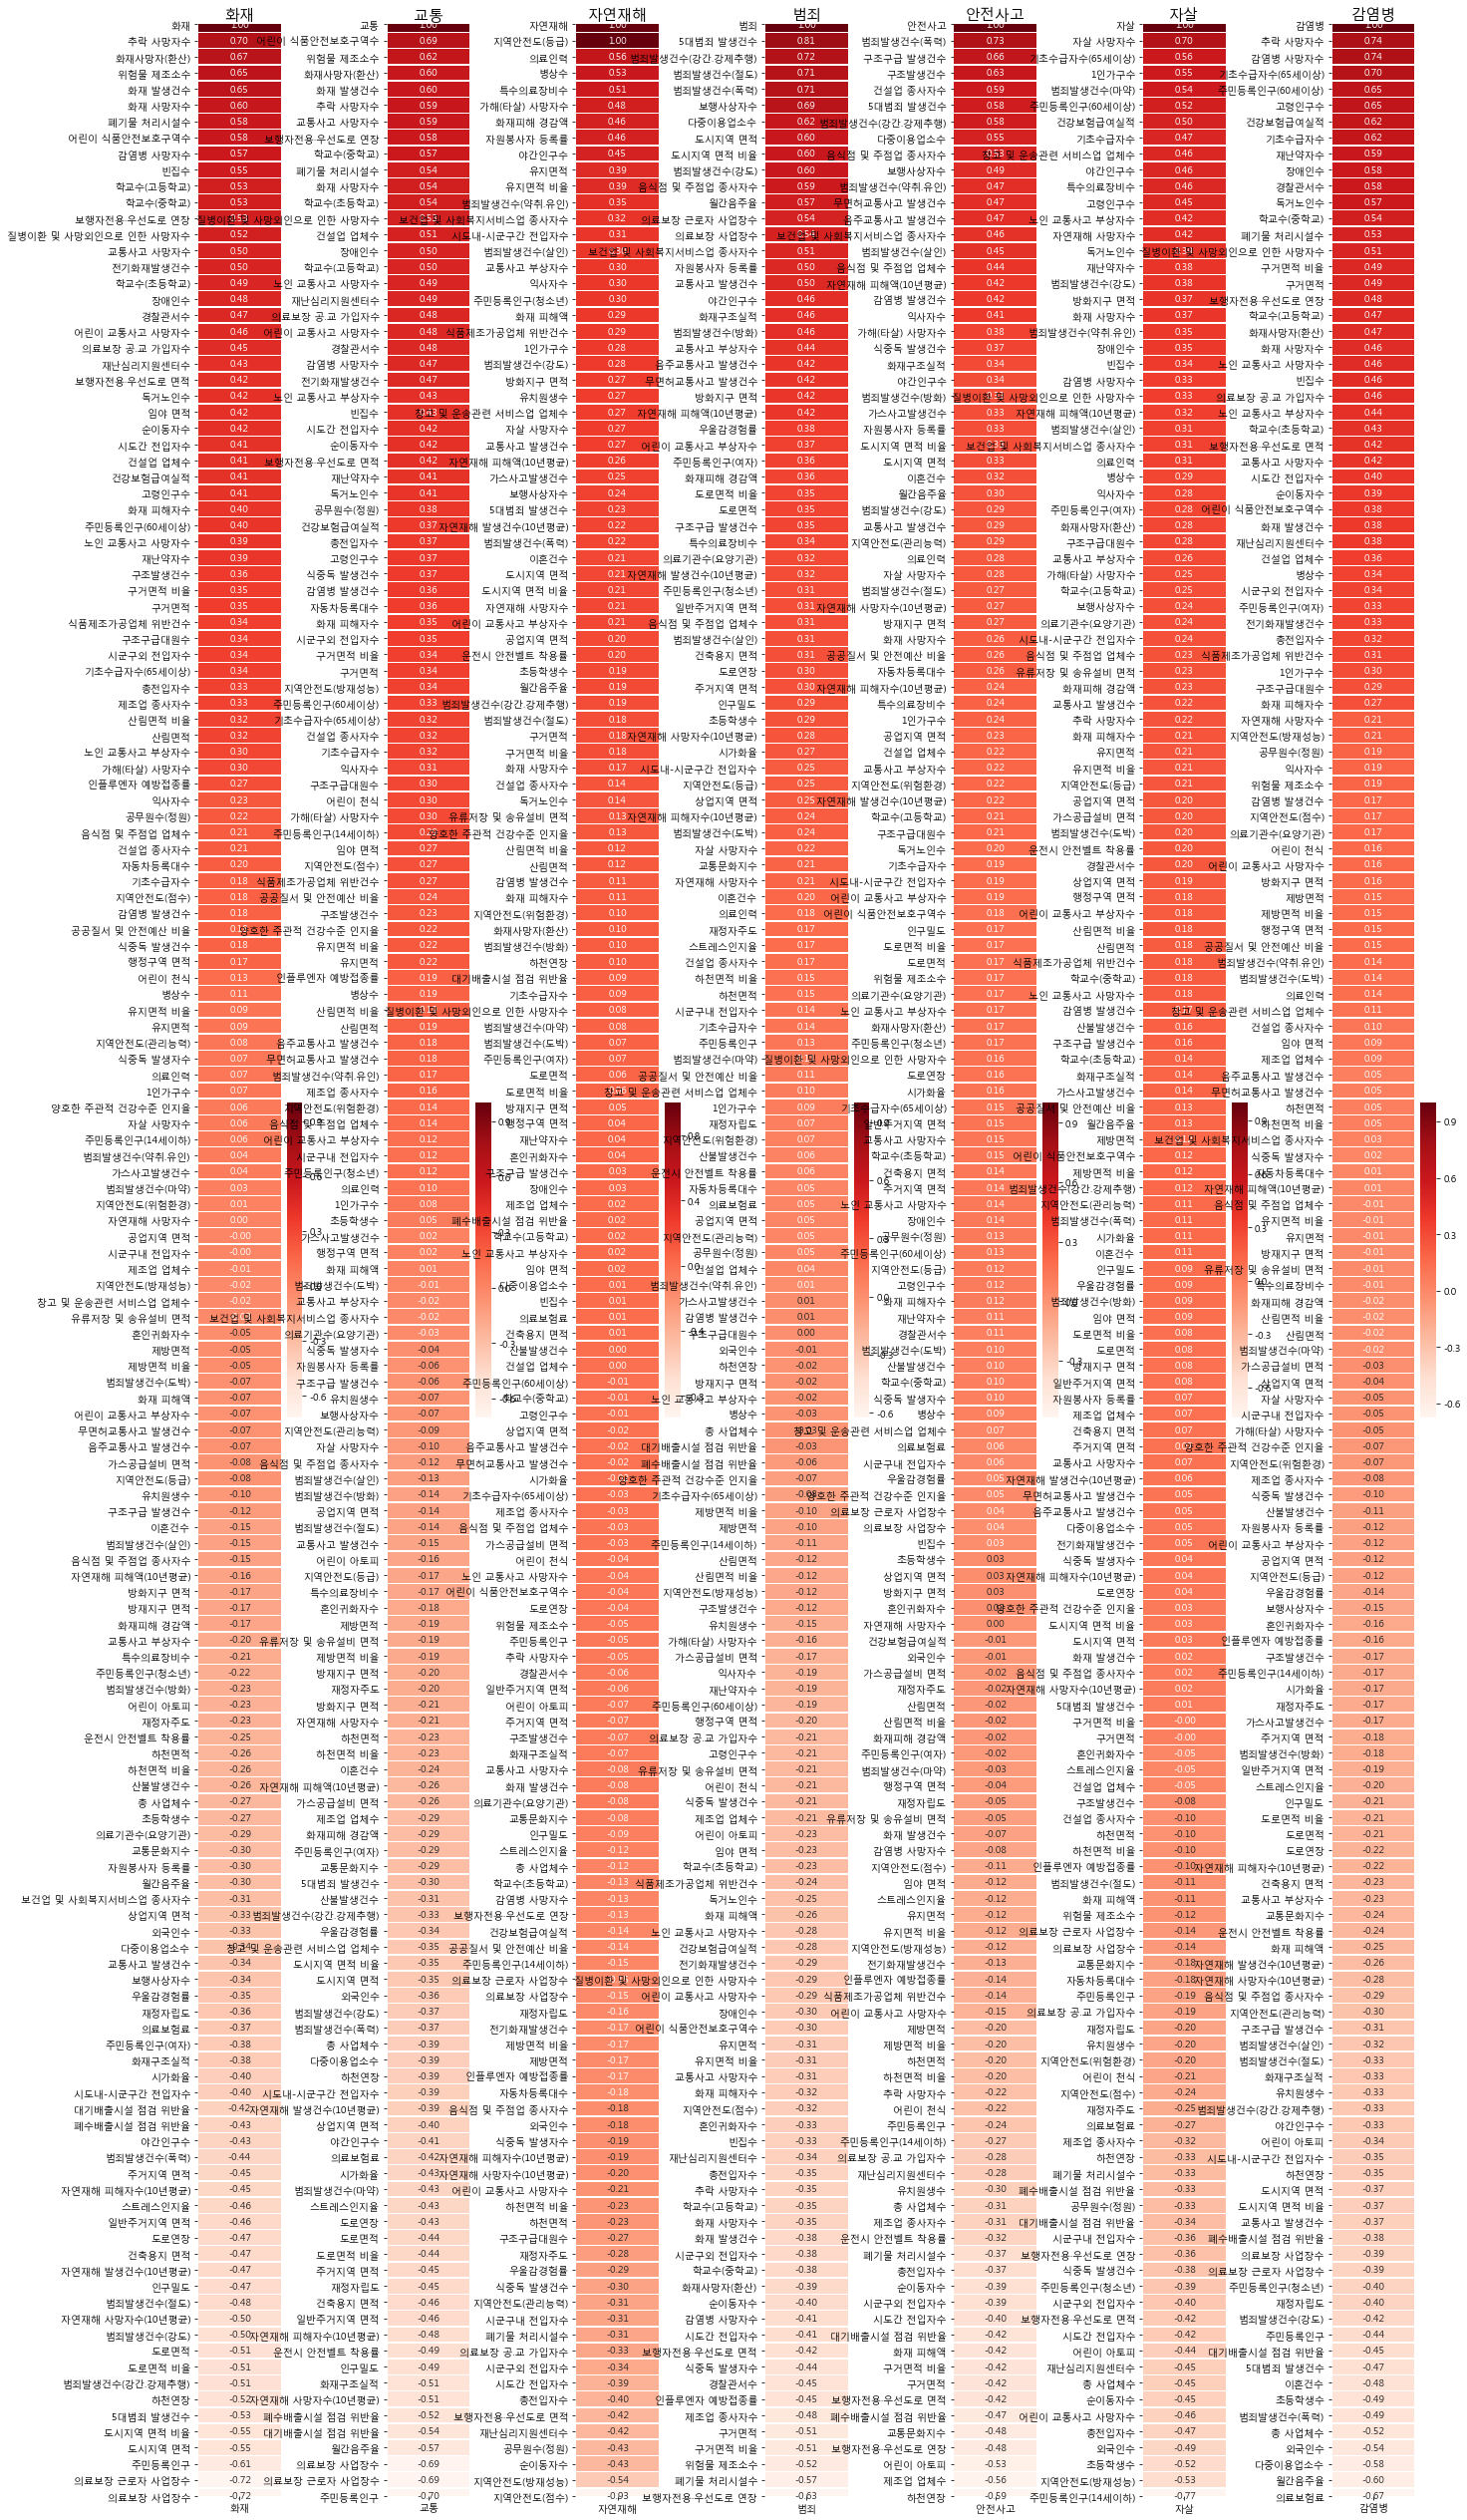

In [94]:
#상관계수 보기

y_lst = ['화재', '교통', '자연재해', '범죄', '안전사고', '자살', '감염병']

plt.figure(figsize = (20,35))

for i, y in enumerate(y_lst):
    orig=pd.concat((sido_null_drop.iloc[:,3:-7],sido_null_drop[y]), axis=1)
    data = pd.DataFrame(orig.corr()[y]).sort_values(by='{}'.format(y), ascending=False)
    plt.subplot(1,7,i+1); sns.heatmap(data = data, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
    plt.title(y, fontsize=15)
    plt.tight_layout(pad=0.3, w_pad=6)
    
plt.show()

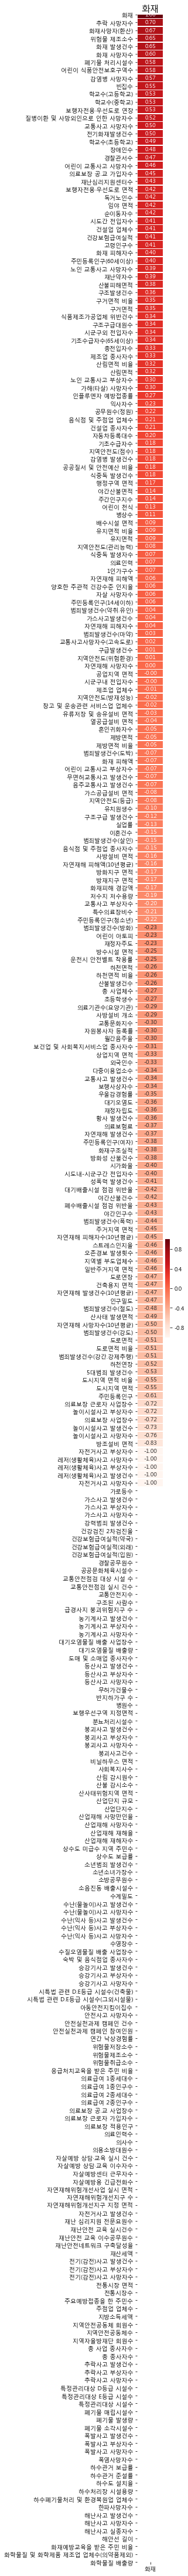

In [109]:
# plt.figure(figsize = (1,80))

# y='화재'

# orig=pd.concat((sido.iloc[:,3:-7],sido[y]), axis=1)
# data = pd.DataFrame(orig.corr()[y]).sort_values(by='{}'.format(y), ascending=False)
# sns.heatmap(data = data, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
# plt.title(y, fontsize=15)
    
# plt.show()

In [112]:
# data
# data.dropna(axis=0, inplace=True)
# len(data.index)

186

In [114]:
# orig=pd.concat((sido_null_drop.iloc[:,3:-7],sido_null_drop[y]), axis=1)
# data1 = pd.DataFrame(orig.corr()[y]).sort_values(by='{}'.format(y), ascending=False)
# len(data1.index)

154

### feature_importance보기 (대충)

In [27]:
X=sido_null_drop.iloc[:,3:-7]
화재=sido_null_drop.iloc[:,-7]

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10).fit(X, 화재)
feature_importance_rf = pd.DataFrame(data=np.c_[X.columns.values, rf.feature_importances_],
                                    columns=['feature', 'importance'])

In [30]:
feature_importance_rf.sort_values("importance", ascending=False, inplace=True)

In [31]:
feature_importance_rf

,feature,importance
71,어린이 교통사고 부상자수,0.0958
14,공무원수(정원),0.0563693
80,위험물 제조소수,0.0553127
17,교통사고 발생건수,0.054594
125,지역안전도(등급),0.0480588
16,교통문화지수,0.0471218
51,보행사상자수,0.0468027
141,학교수(고등학교),0.036315
79,월간음주율,0.0337662
73,어린이 식품안전보호구역수,0.0322088
